# ObsID : 0945020137, SRCNUM : 21, Instru : Combined
Not on Simbad.

## ESASky
https://sky.esa.int/esasky/?target=52.73766666666666%20-28.63463888888889&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033057.0-283804
- RA : 03h 30m 57.047s
- DEC : -28° 38' 04.16"

In [43]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [44]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.

Fit statistic  : Chi-Squared                 46.4185     using 21 bins.

Test statistic : Chi-Squared                 46.4185     using 21 bins.
 Null hypothesis probability of 2.5769e-04 with 18 degrees of freedom
 Current data and model not fit yet.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [45]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*src_spectrum_grp_chi.fits')[0])


1 spectrum  in use
 
Spectral Data File: ObsID0945020137_SRCNUM21_src_spectrum_grp_chi.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.481e-02 +/- 1.532e-03 (41.2 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-21
  Telescope: XMM Instrument: EPIC  Channel Type: PI
  Exposure Time: 1.754e+04 sec
 Using fit statistic: chi
 Using Background File                ObsID0945020137_SRCNUM21_bkg_spectrum_grp.fits
  Background Exposure Time: 1.753e+04 sec
 Using Response (RMF) File            ObsID0945020137_SRCNUM21_response_grp.rmf for Source 1


Fit statistic  : Chi-Squared                 46.4185     using 21 bins.

Test statistic : Chi-Squared                 46.4185     using 21 bins.
 Null hypothesis probability of 2.5769e-04 with 18 degrees of freedom
 Current data and model not fit yet.


In [7]:
print(f"Number of counts = {1.486e-02*1.754e+04} cts")

Number of counts = 260.6444 cts


The number of counts exceeds 100 cts, indicating that the chi-squared test should be a good choice for a goodness-of-fit statistic.

## Plot spectrum

In [46]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot("data")
#spec.ignore("**-0.2 12.0-**")

***Warning: Fit is not current.


(-0.5, 859.5, 659.5, -0.5)

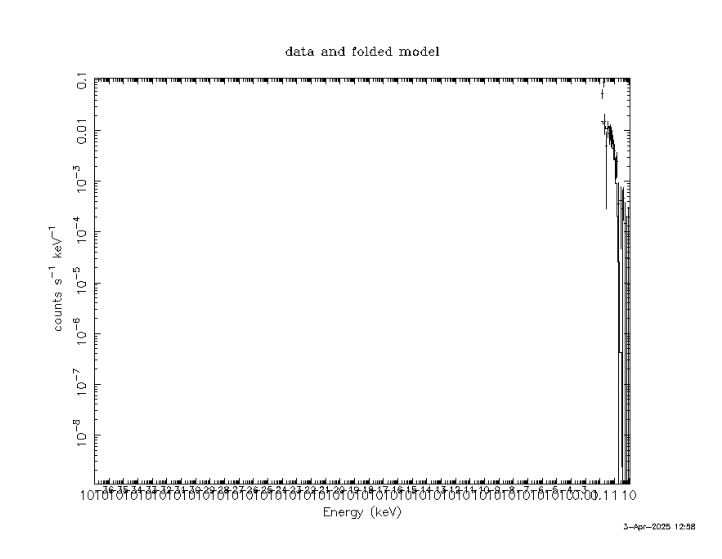

In [40]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*Spectrum_with_*.png')[0])
plt.imshow(img)
plt.axis('off')

**With specgroup :**

**Without specgroup :**

(-0.5, 856.5, 657.5, -0.5)

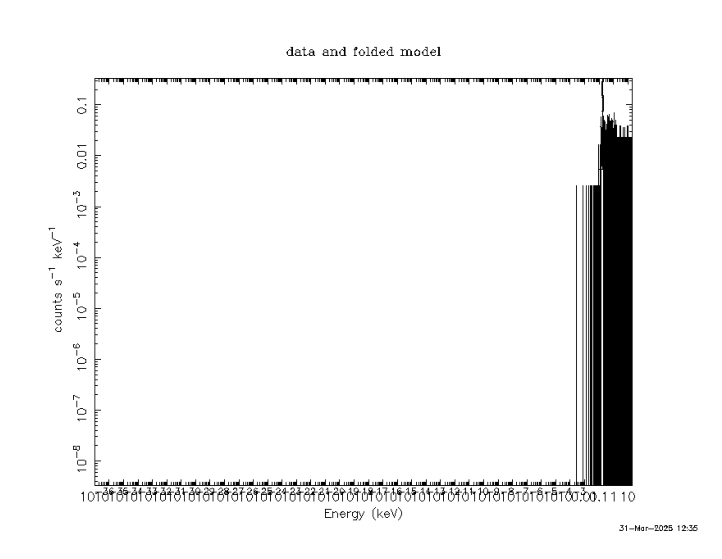

In [35]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*Spectrum_without_*.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model
**tbabs :**

In [36]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.296325e+13     using 21 bins.

Test statistic : Chi-Squared              1.296325e+13     using 21 bins.
 Null hypothesis probability of 0.000000e+00 with 18 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
113.762      0.233798      0   0.000128026       3.10503   5.66612e-07
113.513      1.01936e+06   0   9.81463e-06       3.05154   5.78851e-07
113.32       917259        0   2.95942e-06       3.00697   5.88272e-07
1

(-0.5, 855.5, 656.5, -0.5)

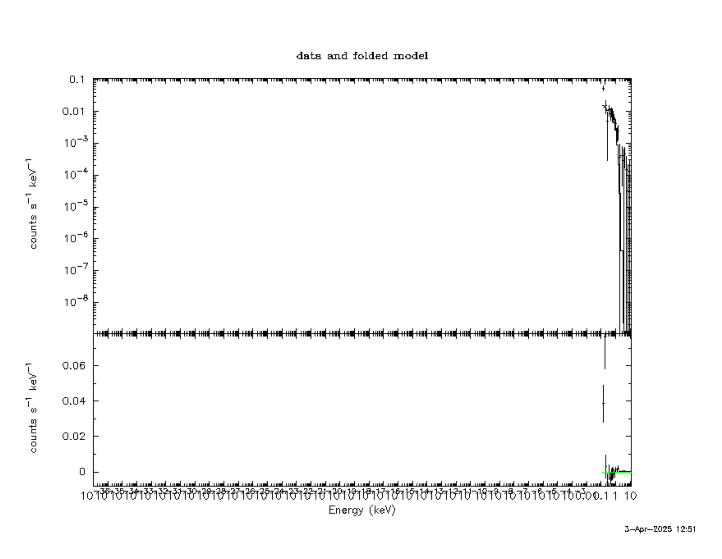

In [37]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')